In [59]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

"""This is a script that trains a Decision Tree Classifier on a dataset of murder records""" 
"""to predict the race of a murderer based on the race of their victim."""

# import data
murder_data = pd.read_csv('database.csv', low_memory=False)

# clean the data
murder_data.rename(columns={"Record ID":"Record_ID","Agency Code":"Agency_Code","Agency Name":"Agency_Name","Agency Type":"Agency_Type","Crime Type":"Crime_Type",
                   "Crime Solved":"Crime_Solved", "Victim Sex":"Victim_sex", "Victim Age":"Victim_Age","Victim Ethnicity":"Victim_Ethnicity","Victim Race":"Victim_Race",
                   "Perpetrator Age":"Perpetrator_Age","Perpetrator Sex":"Perpetrator_Sex","Perpetrator Race":"Perpetrator_Race","Perpetrator Ethnicity":"Perpetrator_Ethnicity","Victim Count":"Victim_Count",
                   "Perpetrator Count":"Perpetrator_Count", "Record Source":"Record_Source"},inplace=True)


# split the data set into in- and output. in this case Victim Race and Perpetrator Race
# races are "White", "Black", "Unknown", "Asian/Pacific Islander" and "Native American/Alaska Native"
# encode races to integers so it can be used by the machine learning algorithm
le_victim = LabelEncoder()
murder_data["Victim_Race"]= le_victim.fit_transform(murder_data["Victim_Race"])

le_perp = LabelEncoder()
murder_data["Perpetrator_Race"] = le_perp.fit_transform(murder_data["Perpetrator_Race"])

le_victim.transform(le_victim.classes_)
le_perp.transform(le_perp.classes_)

X = murder_data[["Victim_Race"]]
y = murder_data["Perpetrator_Race"]

#. split data into training/test (returns a tuple)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# changing the shape of y to (n_samples, )
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

#. create a model
model = DecisionTreeClassifier()

#. train the model
model.fit(X_train, y_train)

#. make prediction using data reserved for testing
predictions = model.predict(X_test)

#7. evaluate (and improve)
score = accuracy_score(y_test, predictions)
# accuracy score in percentage
f"this model with the current specifications has roughly {100*score:,.2f}% accuracy in predicting killer's race based on the victim's race"



"this model with the current specifications has roughly 60.60% accuracy in predicting killer's race based on the victim's race"

In [67]:
import pandas as pd

murder_data = pd.read_csv("database.csv", low_memory=False)

murder_data.rename(columns={"Record ID":"Record_ID","Agency Code":"Agency_Code","Agency Name":"Agency_Name","Agency Type":"Agency_Type","Crime Type":"Crime_Type",
                   "Crime Solved":"Crime_Solved", "Victim Sex":"Victim_sex", "Victim Age":"Victim_Age","Victim Ethnicity":"Victim_Ethnicity","Victim Race":"Victim_Race",
                   "Perpetrator Age":"Perpetrator_Age","Perpetrator Sex":"Perpetrator_Sex","Perpetrator Race":"Perpetrator_Race","Perpetrator Ethnicity":"Perpetrator_Ethnicity","Victim Count":"Victim_Count",
                   "Perpetrator Count":"Perpetrator_Count", "Record Source":"Record_Source"},inplace=True)

print("the unique races for both victims and perps that are encoded to '[0,1,2,3,4]' in the previous section of the notebook:\n")
murder_races = murder_data["Perpetrator_Race"].unique()
print(murder_races)

victim_races = murder_data["Victim_Race"].unique()
print(victim_races)



the unique races for both victims and perps that are encoded to '[0,1,2,3,4]' in the previous section of the notebook:

['Native American/Alaska Native' 'White' 'Unknown' 'Black'
 'Asian/Pacific Islander']
['Native American/Alaska Native' 'White' 'Black' 'Unknown'
 'Asian/Pacific Islander']


Total number of murders involving black victims found in database: 299899


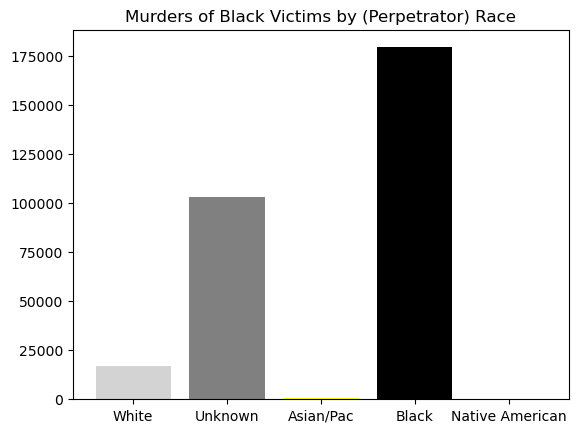

In [68]:
# total amount of black victims in murder database
black_victims = murder_data[murder_data["Victim_Race"] == "Black"].shape[0]
print("Total number of murders involving black victims found in database:", black_victims)

# amount of white people guilty of the murder of a black individual
white_perp_black_vic = murder_data[(murder_data["Perpetrator_Race"] == "White") & (murder_data["Victim_Race"] == "Black")].shape[0]
# ("Number of murders where the perp is white and the victim is black:", black_perp_white_vic)

# amount of black murders where the race of the perp is unknown
unknown_perp_black_vic = murder_data[(murder_data["Perpetrator_Race"] == "Unknown") & (murder_data["Victim_Race"] == "Black")].shape[0]
# ("Number of murders where the race of the perp is unknown and the victim is black:", unknown_perp_black_vic)

# amount of black murders where the race of the perp is asian
asian_perp_black_vic = murder_data[(murder_data["Perpetrator_Race"] == "Asian/Pacific Islander") & (murder_data["Victim_Race"] == "Black")].shape[0]
# ("Number of murders where the perp is asian/pacific and the victim is black:", asian_perp_black_vic)

# amount of black people murdered by native american
native_perp_black_vic = murder_data[(murder_data["Perpetrator_Race"] == "Native American/Alaska Native") & (murder_data["Victim_Race"] == "Black")].shape[0]
# ("Number of murders where the perp is native american and the victim is black:", native_perp_black_vic)

# amount of black people killing black people
black_perp_black_vic = murder_data[(murder_data["Perpetrator_Race"] == "Black") & (murder_data["Victim_Race"] == "Black")].shape[0]
# ("Number of murders where the perp is black and the victim is black:", black_perp_black_vic)


labels = ["White", "Unknown", "Asian/Pac", "Black", "Native American"]
values = [white_perp_black_vic, unknown_perp_black_vic, asian_perp_black_vic, black_perp_black_vic, native_perp_black_vic]

# graph title and labels for axis
plt.title("Murders of Black Victims by (Perpetrator) Race")
plt.xlabel("")
plt.ylabel("")

# bar charts
plt.bar(labels, values, color=["lightgray", "gray", "yellow", "black", "red"])

# show graph
plt.show()


In [69]:
male_killer = murder_data[murder_data["Perpetrator_Sex"]=="Male"].shape[0]
print("Total number of murders committed by men in database:", male_killer)

# number of murders in database perpetrated by men going by race
murder_data[murder_data["Perpetrator_Sex"]=="Male"].Perpetrator_Race.value_counts()


Total number of murders committed by men in database: 399541


White                            195837
Black                            189736
Unknown                            5502
Asian/Pacific Islander             5449
Native American/Alaska Native      3017
Name: Perpetrator_Race, dtype: int64

In [20]:
female_killer = murder_data[murder_data["Perpetrator_Sex"]=="Female"].shape[0]
print("Total number of murders committed by women in database:", female_killer)

# number of murders in database perpetrated by women going by race
murder_data[murder_data["Perpetrator_Sex"]=="Female"].Perpetrator_Race.value_counts()

Total number of murders committed by women in database: 48548


Black                            24648
White                            22342
Native American/Alaska Native      578
Asian/Pacific Islander             577
Unknown                            403
Name: Perpetrator_Race, dtype: int64

In [52]:
# total amount of murders in murder database (rows in database)
total_murders = murder_data.shape[0]
print("Total murders in database:", total_murders)


Total murders in database: 638454


In [87]:
male_perp_black_victims = murder_data[(murder_data["Perpetrator_Sex"]=="Male") & (murder_data["Victim_Race"]=="Black") & (murder_data["Perpetrator_Race"]=="Black")].shape[0]
print("Amount of murders committed by black males on fellow black men:", male_perp_black_victims)

male_black_victims = murder_data[(murder_data["Perpetrator_Sex"]=="Male") & (murder_data["Victim_Race"]=="Black")].shape[0]
print("Amount of murders committed by males on black men:", male_black_victims)

print()

percentage_black = ( male_perp_black_victims / male_black_victims) * 100
print(f"\tThis amounts to {percentage_black:,.2f}% of murders of black men committed by other black males")

print()

male_perp_white_victims = murder_data[(murder_data["Perpetrator_Sex"]=="Male") & (murder_data["Victim_Race"]=="White") & (murder_data["Perpetrator_Race"]=="White")].shape[0]
print("Amount of murders committed by white males on fellow white men:", male_perp_white_victims)

male_white_victims = murder_data[(murder_data["Perpetrator_Sex"]=="Male") & (murder_data["Victim_Race"]=="White")].shape[0]
print("Amount of murders committed by males on white men:", male_white_victims)

print()

percentage_white = ( male_perp_white_victims / male_white_victims) * 100
print(f"\tThis amounts to {percentage_white:,.2f}% of murders of white men committed by other white males")



Amount of murders committed by black males on fellow black men: 156110
Amount of murders committed by males on black men: 174098

	This amounts to 89.67% of murders of black men committed by other black males

Amount of murders committed by white males on fellow white men: 176459
Amount of murders committed by males on white men: 212526

	This amounts to 83.03% of murders of white men committed by other white males
